In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from scipy.optimize import minimize
from scipy.optimize import least_squares
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
import pandas as pd

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [3]:
def f(x):
    return 1 / (x**2 - 3 * x + 2)

In [4]:
#data generation
k = np.array(range(1000))
delta = np.random.normal(size=1000)
x = 3 * k / 1000
x0 = [1, 1, 1, 1]
eps = 0.001
bounds = ((-3, 3), (-3, 3), (-3, 3), (-3, 3))

In [5]:
#data generation
y = []
for xk in x:
    if f(xk) < -100:
        y.append(-100 + np.random.normal())
    elif -100 <= f(xk) and f(xk) <= 100:
        y.append(f(xk) + np.random.normal())
    else:
        y.append(100 + np.random.normal())
y = np.array(y)

In [6]:
def F(params, x):
    a, b, c, d = params
    return (a * x + b) /(x**2 + c*x + d)

In [7]:
def D(params):
    return MSE(F(params, x), y)
def D_ls(params):
    return (F(params, x) - y)

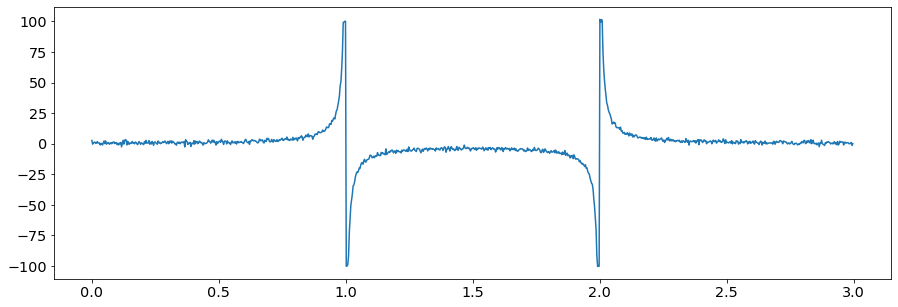

In [8]:
plt.plot(x, y)

In [9]:
#Nelder-Mead method
N_M = minimize(D, x0, method='Nelder-Mead', options={'maxiter': 1000, 'xatol': 0.001})
N_M_results = np.hstack((N_M.x, [N_M.fun, int(N_M.nfev), int(N_M.nit)]))
N_M

 final_simplex: (array([[-0.22983645,  0.23056128, -2.00476683,  1.00476972],
       [-0.22984604,  0.230572  , -2.00476853,  1.00477141],
       [-0.22983957,  0.23056489, -2.00476889,  1.00477177],
       [-0.22984952,  0.23057544, -2.00476391,  1.00476678],
       [-0.22984721,  0.23057283, -2.00476314,  1.00476601]]), array([190.27853236, 190.27855141, 190.27855971, 190.27860401,
       190.27861231]))
           fun: 190.27853235906431
       message: 'Optimization terminated successfully.'
          nfev: 1119
           nit: 663
        status: 0
       success: True
             x: array([-0.22983645,  0.23056128, -2.00476683,  1.00476972])

In [59]:
#Levenberg-Marquardt algorithm
L_M = least_squares(D_ls, x0=x0, method='lm', xtol=eps)
L_M_results = np.hstack((L_M.x, [MSE(F(L_M.x, x), y), int(L_M.nfev), int(L_M.nfev)-4]))

In [11]:
#Simulated annealing
D_A = dual_annealing(D, bounds=bounds, no_local_search=True, maxiter=1000, local_search_options={'xatol': 0.001})
D_A_results = np.hstack((D_A.x, [D_A.fun, int(D_A.nfev), D_A.nit]))
D_A

     fun: 256.7044713966334
 message: ['Maximum number of iteration reached']
    nfev: 8001
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-2.2474257 ,  2.29005496, -2.17342109,  1.20173474])

In [40]:
#Differential evolution
D_E = differential_evolution(D, bounds=bounds, maxiter=1000)
D_E_results = np.hstack((D_E.x, [D_E.fun, int(D_E.nfev), int(D_E.nit)]))
D_E

     fun: 136.54905293411
     jac: array([ 2.71473652, -2.29694308, 12.18145371, 13.46709553])
 message: 'Optimization terminated successfully.'
    nfev: 1250
     nit: 7
 success: True
       x: array([-0.96229785,  0.96276861, -2.00092739,  1.00094226])

In [18]:
labels = ['Nelder-Mead method', 'Levenberg-Marquardt algorithm', 'Simulated annealing', 'Differential evolution']

In [23]:
np.reshape(labels, (4, 1))

array([['Nelder-Mead method'],
       ['Levenberg-Marquardt algorithm'],
       ['Simulated annealing'],
       ['Differential evolution']], dtype='<U29')

In [54]:
data = np.vstack((N_M_results, L_M_results, D_A_results, D_E_results))
columns = ['a', 'b', 'c', 'd', 'fun', 'nfev', 'niter']

In [55]:
#optimization results
df = pd.DataFrame(columns=columns, data=data)
df['algorithm'] = labels
df

,a,b,c,d,fun,nfev,niter,algorithm
0,-0.229836,0.230561,-2.004767,1.004770,190.278532,1119.0,663.0,Nelder-Mead method
1,-1.002891,1.003358,-2.000832,1.000848,136.451620,156.0,152.0,Levenberg-Marquardt algorithm
2,-2.247426,2.290055,-2.173421,1.201735,256.704471,8001.0,1000.0,Simulated annealing
3,-0.962298,0.962769,-2.000927,1.000942,136.549053,1250.0,7.0,Differential evolution


In [56]:
df.to_excel("report 4.xlsx")

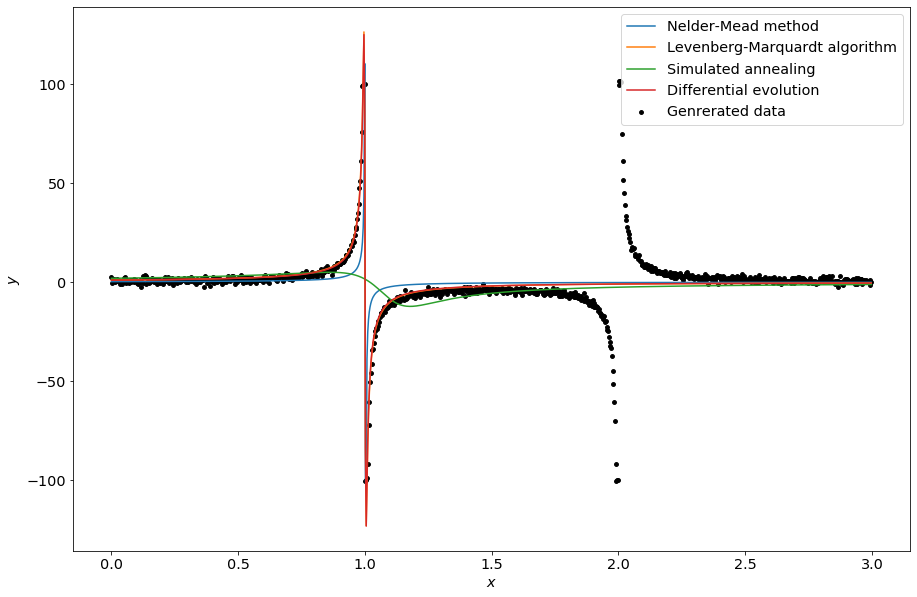

In [58]:
coef = data[:,:4]

plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='k', s=15, label="Genrerated data")
for i in range(4):
    plt.plot(x, F(coef[i], x), label=labels[i])
    
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='upper right')
plt.show()